# Homework #2

## Introduction to unsupervised learning

This colaboratory contains Homework #2 which is due **October 5 midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:

_(just in case reminding you)_

1.  Please, submit only .ipynb that you extract from the Colaboratory.
2.  Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3.  Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4.  Please, make sure to avoid unnecessary long printouts.
5.  Each task should be solved right under the question of the task and not elsewhere.
6.  Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:

1. Pooh


##List of Homework's exercises:

1.  [Ex1](#scrollTo=1YXt-Gxw9UY7) - 4 points
2.  [Ex2](#scrollTo=x93C489B3rq9) - 3 points
3.  [Ex3](#scrollTo=6ixMMWLE1XGr) - 3 points
4.  [Bonus 1](#scrollTo=93rYhdhm3by8) - 0.5 points
5.  [Bonus 2](#scrollTo=IhIMUQjs3bzV) - 0.5 points
6.  [Bonus 3](#scrollTo=3vwwyCwumcxJ&line=3&uniqifier=1) - 4 points


## HW Setup:


In [130]:
# The three giants on top which everything else is built
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We don't like warnings
import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

from tensorflow.keras.datasets import mnist

## Homework exercise 1 (4 points): PCA on MNIST

<font color=''> In this exercise we shall look into the effects of using PCA on the execution time of ML algorithms as well as their performance. To this end we will load **the entire** MNIST dataset.
</font>


In [131]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images / 255 # normalising train images
test_images = test_images / 255 # normalising test images

# reshaping each image 28x28 into a vector of 784 values
# needed for the scikit learn to work properly
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])

<font color=''> Here we perform standardization of both training and test sets using mean and standard deviation computed based on training data (because in reality test set statistics is not available).
</font>


In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Here we evaluate mean and standard deviation based on training.
scaler.fit(train_images)

# Apply transform to both the training set and the test set.
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

<font color=''> In this exercise we will use another type of linear model called Logistic Regression. We have not discussed this model in the lecture, hence we give it a short introduction here. Logistic Regression is very similar to Linear Regression model that we had an opportunity to try last time, with an important difference - it is a **classification model**. Also, unlike Linear Regression which uses the least squares method to fit the line, Logistic Regression uses a principle called **maximum likelihood** to fit the model. In simpler terms, you can think of Logistic Regression as an extension to Linear Regression that helps to convert continuous predictions into probabilities and then to classes.

For the sake of this exercise, you do not need to know all the details of the method. [Here](https://towardsdatascience.com/logistic-regression-explained-9ee73cede081) you can find more information about Logistic Regression and maximum likelihood method.
</font>


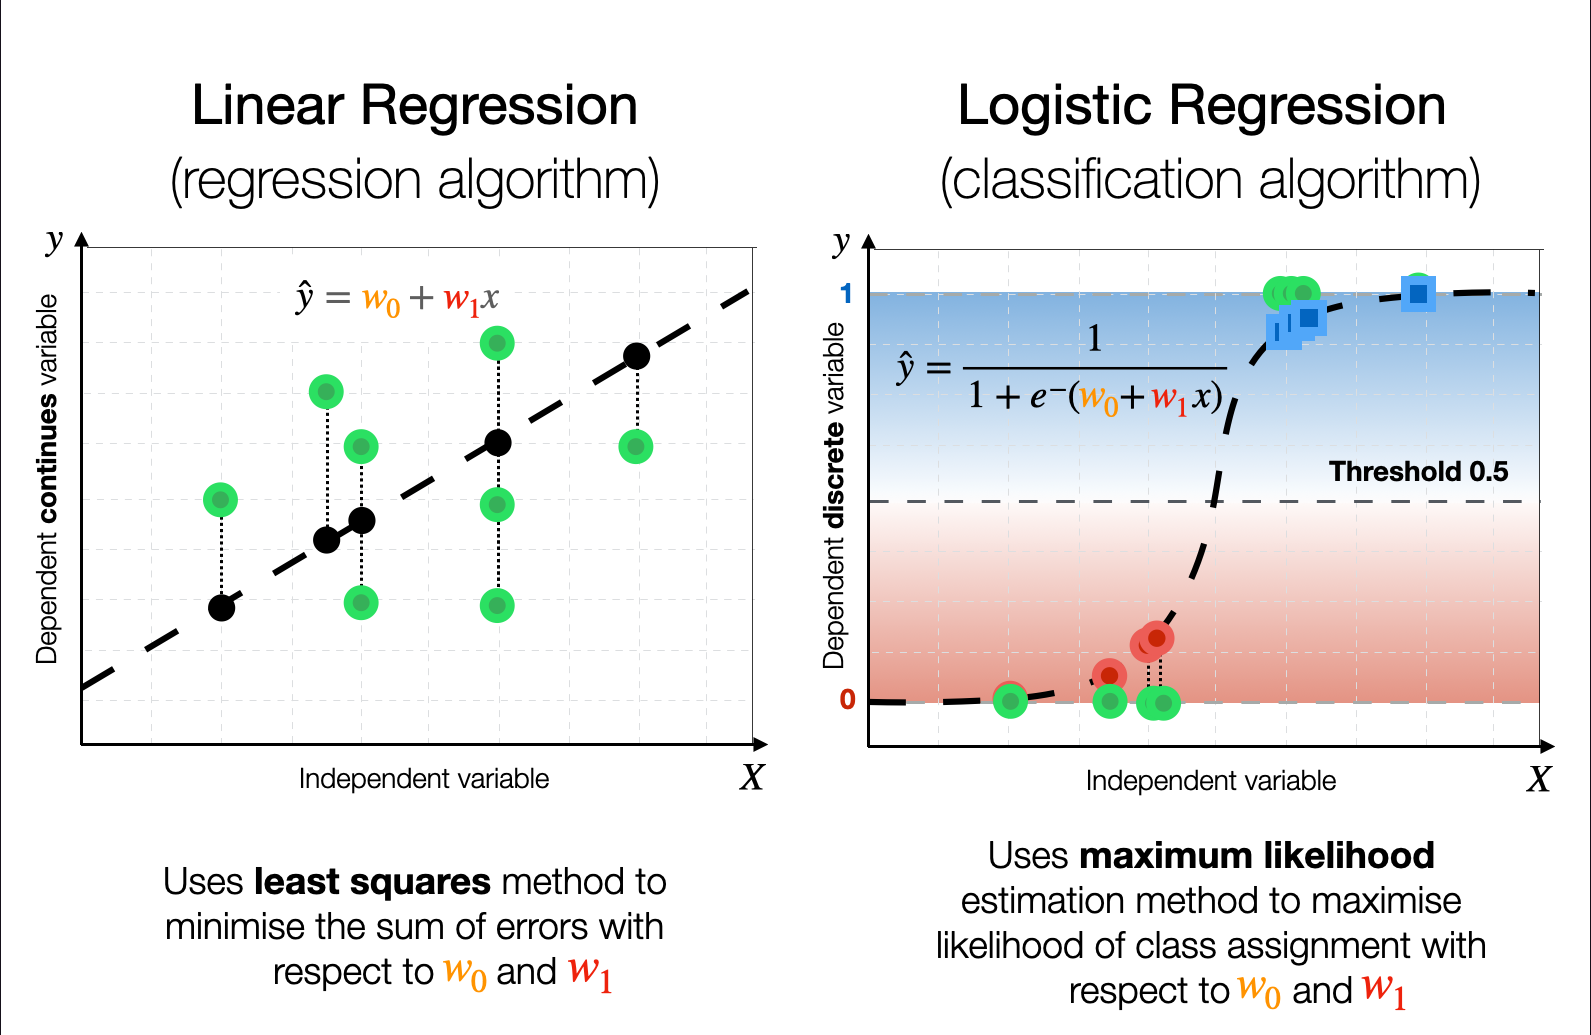


<font color=''>**(Homework exercise 1- a)** Run vanila Logistic Regression on original data, calculate and report the score on test images (which in this case is accuracy) and fitting time (use `time` library as in the practice session). (1 point)
</font>


In [133]:
# WE HAVENT USED TIME????

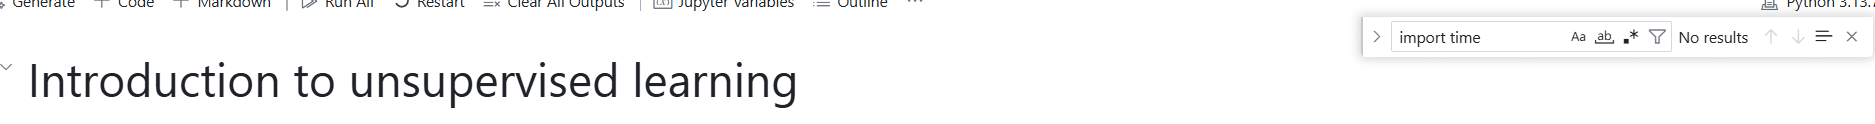


In [134]:
from sklearn.linear_model import LogisticRegression
import time

# default solver is incredibly slow hence you should use 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

##### YOUR CODE STARTS #####
start_time = time.time()

logisticRegr.fit(train_images, train_labels)

exec_time = time.time() - start_time
score = logisticRegr.score(test_images, test_labels)
##### YOUR CODE ENDS #####

n_features = train_images.shape[1]
print(f"It took {exec_time} seconds to get {score} accuracy using {n_features} features")

It took 6.587179899215698 seconds to get 0.9246 accuracy using 784 features


<font color=''>**(Homework exercise 1- b)** Perform a PCA on MNIST data. Retain as many PCs as needed to explain 90% of original variance. Visualise the projections on the first two principle components of the training images usign the scatter plot. (1 point)


In [135]:
from sklearn.decomposition import PCA
##### YOUR CODE STARTS #####
# Fit PCA on train images
pca_09 = PCA(n_components=2) # 2 because 2 dimentions?

pca_09.fit(train_images)

train_images_compressed = pca_09.transform(train_images)
test_images_compressed = pca_09.transform(test_images)
##### YOUR CODE ENDS #####

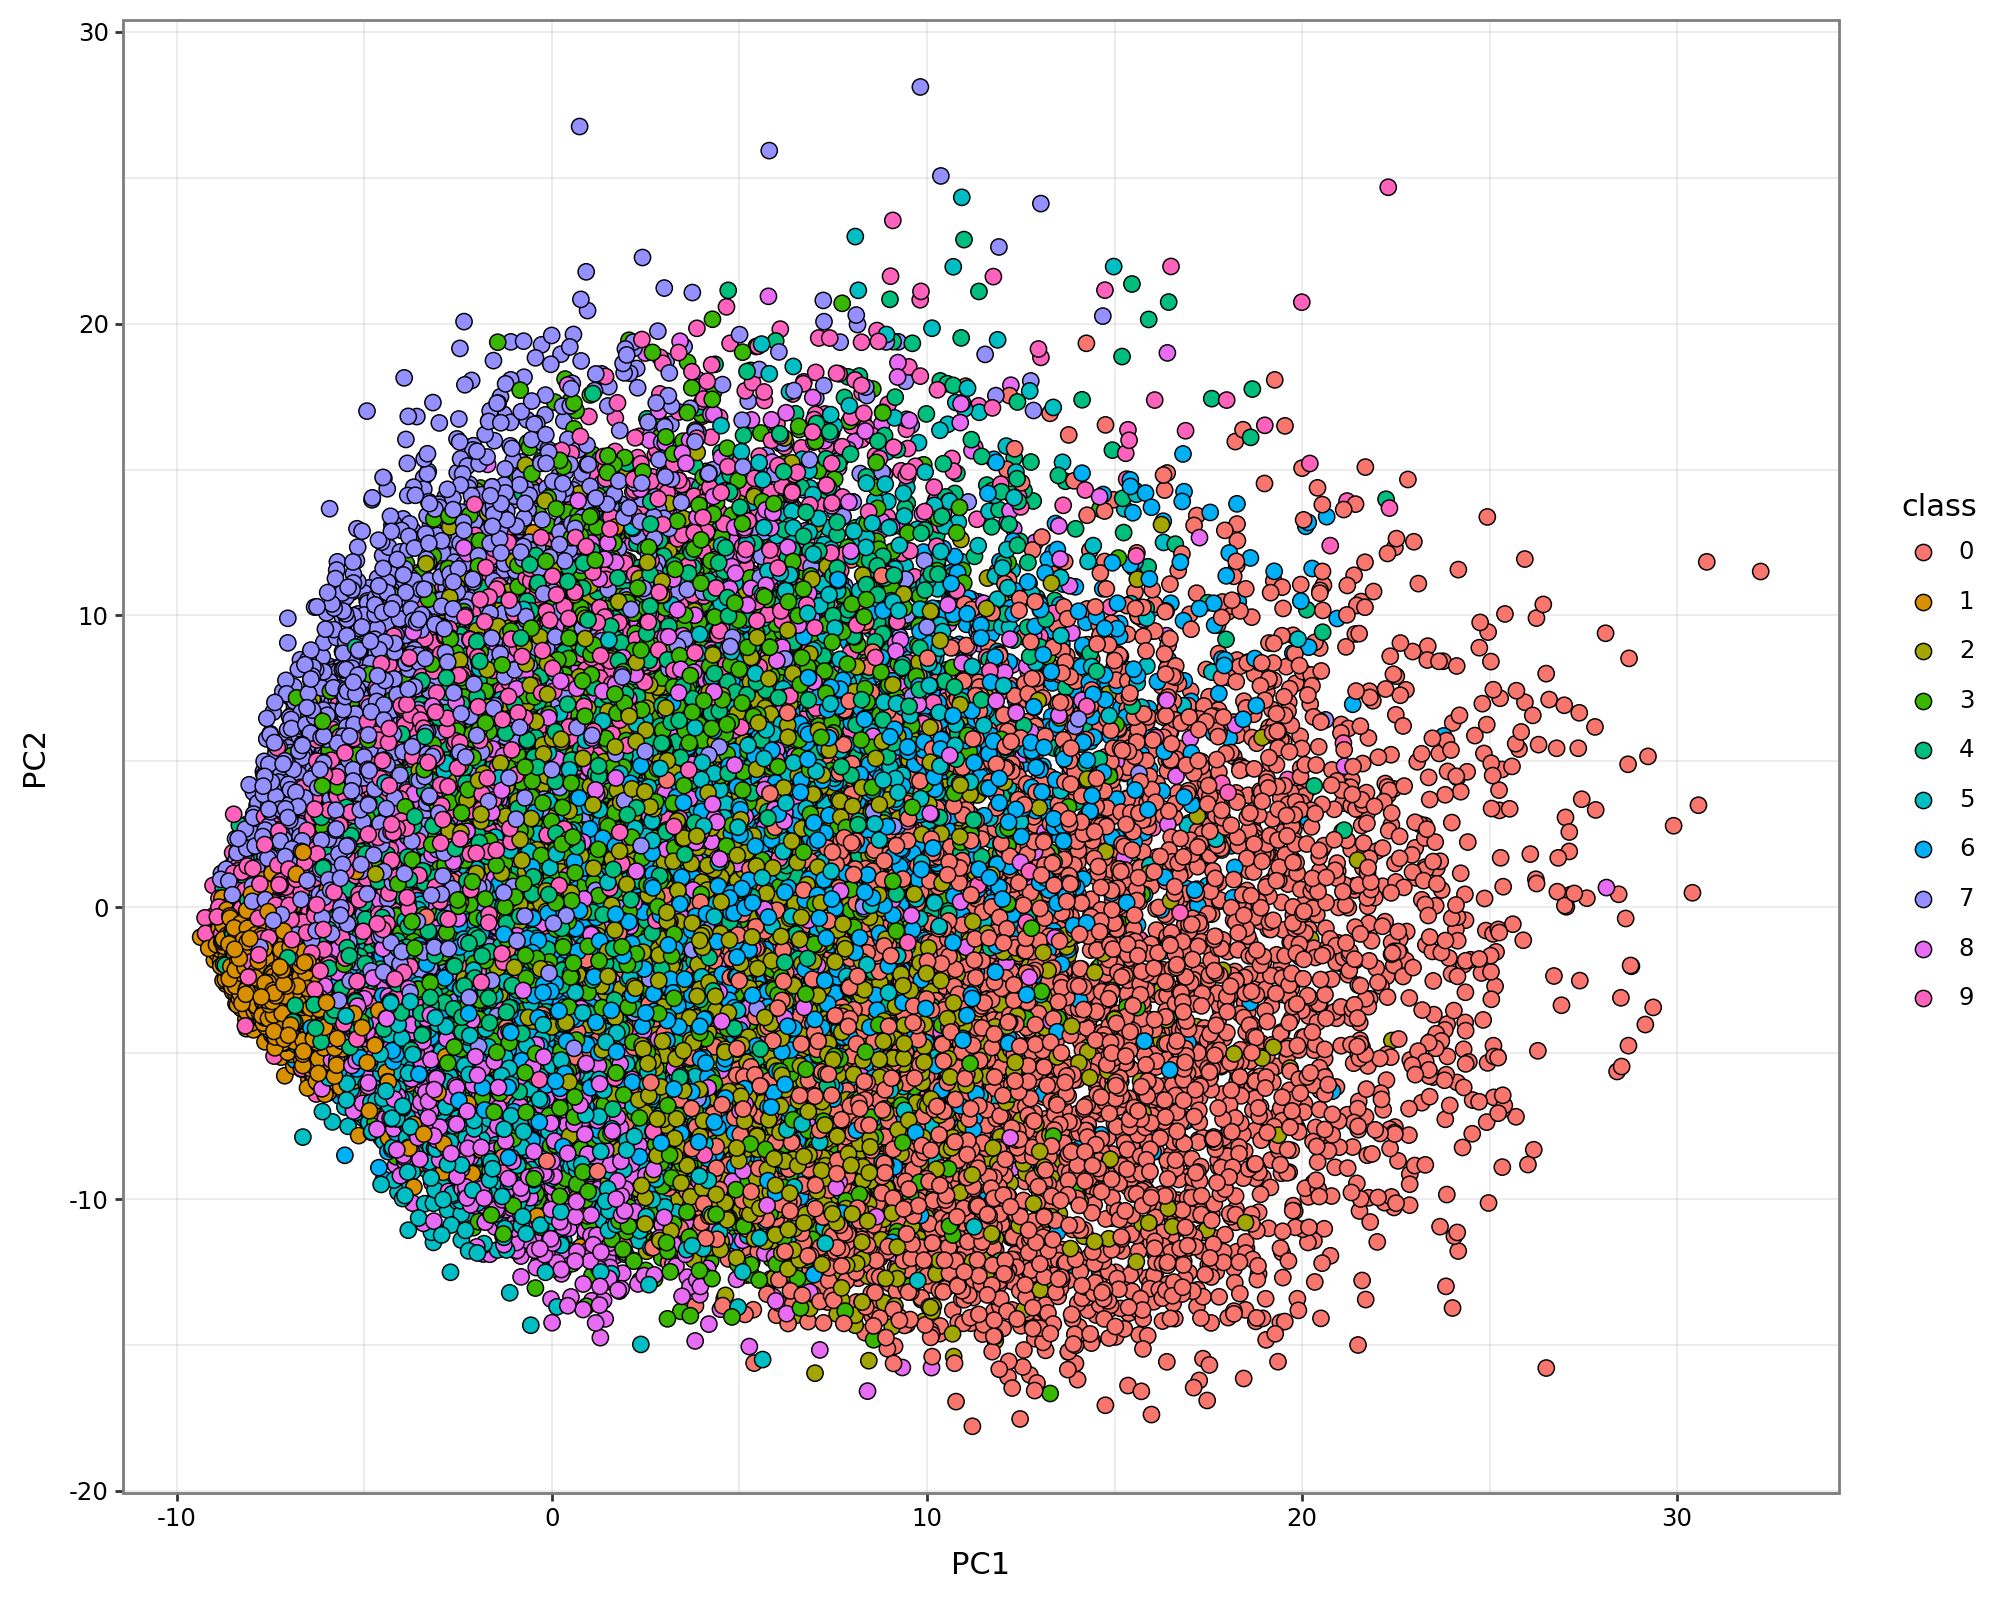

In [136]:
##### YOUR CODE STARTS #####
visualise_train =  pd.DataFrame(
	{
		'PC1':np.array(train_images_compressed.T)[0],
            'PC2':np.array(train_images_compressed.T)[1],
		'class': train_labels
      }
)
##### YOUR CODE ENDS #####

visualise_train['class'] = visualise_train['class'].astype("category")
fig = (
    ggplot(data = visualise_train,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(fill = 'class'), size = 3, shape = 'o', stroke = 0.3) +

    # All the style related codes goes here:
    labs(title ='', x = 'PC1', y = 'PC2',) +
    theme_bw() +
    theme(figure_size = (10, 8),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

<font color=''>**(Homework exercise 1- c)** Fit the Logistic Regression on `train_images_compressed`, calculate and report the fitting time, the accuracy on test images (aka `score`) and the number of principle components that were kept (in `n_features`). (0.5 points)
</font>


In [137]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
##### YOUR CODE STARTS #####
start_time = time.time()
logisticRegr.fit(train_images_compressed, train_labels)

exec_time = time.time() - start_time
score = logisticRegr.score(test_images_compressed, test_labels)
n_features = train_images_compressed.shape[1]
##### YOUR CODE ENDS #####
print(f"It took {exec_time} seconds to get {score} accuracy using {n_features} features")

It took 0.7196033000946045 seconds to get 0.3413 accuracy using 2 features


<font color=''>**(Homework exercise 1- d)** Combine **1-b** (except for visualisation of PCA) and **1-c** in the for loop, every time retaining different amount of variance (from 0.85 to 0.5 with a step of 0.05). In every iteration collect information on how much the execution time and accuracy changes with respect to the number of principle components kept by the PCA. (1 point).
</font>


In [138]:
for variance in [0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]:
  print(f"Retaining {variance*100}% of variance")
  ##### YOUR CODE STARTS #####
  pca = PCA(variance)

  pca.fit(train_images)

  train_images_compressed = pca.transform(train_images)
  test_images_compressed = pca.transform(test_images)

  logisticRegr = LogisticRegression(solver = 'lbfgs')
  start_time = time.time()
  logisticRegr.fit(train_images_compressed, train_labels)


  exec_time = time.time() - start_time
  score = logisticRegr.score(test_images_compressed, test_labels)
  n_features = train_images_compressed.shape[1]
  ##### YOUR CODE ENDS #####
  print(f"It took {exec_time} seconds to get {score} using {n_features} features")

Retaining 85.0% of variance
It took 2.376734733581543 seconds to get 0.9264 using 185 features
Retaining 80.0% of variance
It took 2.1083197593688965 seconds to get 0.9237 using 149 features
Retaining 75.0% of variance
It took 1.8344061374664307 seconds to get 0.9214 using 120 features
Retaining 70.0% of variance
It took 1.6800446510314941 seconds to get 0.9196 using 98 features
Retaining 65.0% of variance
It took 1.7732393741607666 seconds to get 0.9174 using 80 features
Retaining 60.0% of variance
It took 1.6019752025604248 seconds to get 0.9108 using 64 features
Retaining 55.00000000000001% of variance
It took 1.4416229724884033 seconds to get 0.9042 using 50 features
Retaining 50.0% of variance
It took 1.417048454284668 seconds to get 0.9001 using 39 features


<font color=''>**(Homework exercise 1- e)** Shortly answer the following questions (0.5 points):

-   What minimum number of principle components was needed in **1- d** to approximately match the performance on the original data?
-   How much faster was the model trained on that number of PCs compared to the original data?
-   What are the main advantages and disadvantages of PCA transformation?
-   When would you use the PCA transformation and when you wouldn't?
    </font>


Your answer (e):


In [139]:
# If we take 0.9 as minimun score that we accept (according to Dima :D), then whe can use 50 features, so n=50.

In [140]:
# with 50 features it took 1.4951767921447754 seconds, with all features it took 5.6864259243011475 seconds - so about 3.8 times faster.

5.6864259243011475 / 1.4951767921447754

3.803179633456042

In [141]:
# The advantages are that time is saved and less computational resources are used. The disadvantages are that some accuracy is lost. Also you loose feature meanings, it can be come nosnecense prettry much, the classses mean nothing anymore.
# if you predict anything based on PCs, the meaning of original features is not preserved after the transformation

In [142]:
# I would use PCA-s when there are alot of features. I would not use PCA-s when the features are few and have a meaning that I want to preserve.

## Homework exercise 2 (3 points): Increasing the dimensionality

<font color=''> In the lecture and also in the practice session we have mostly discussed benefits of reducing the number of dimensions. It turns out (as often in life) that the opposite i.e. adding features can also sometimes be very useful. For example, we have seen in the first homework, how constructing a better distance measure helps us predict taxi ride prices in NYC. Hence, in this exercise, we will further explore the potential of **feature engineering**.
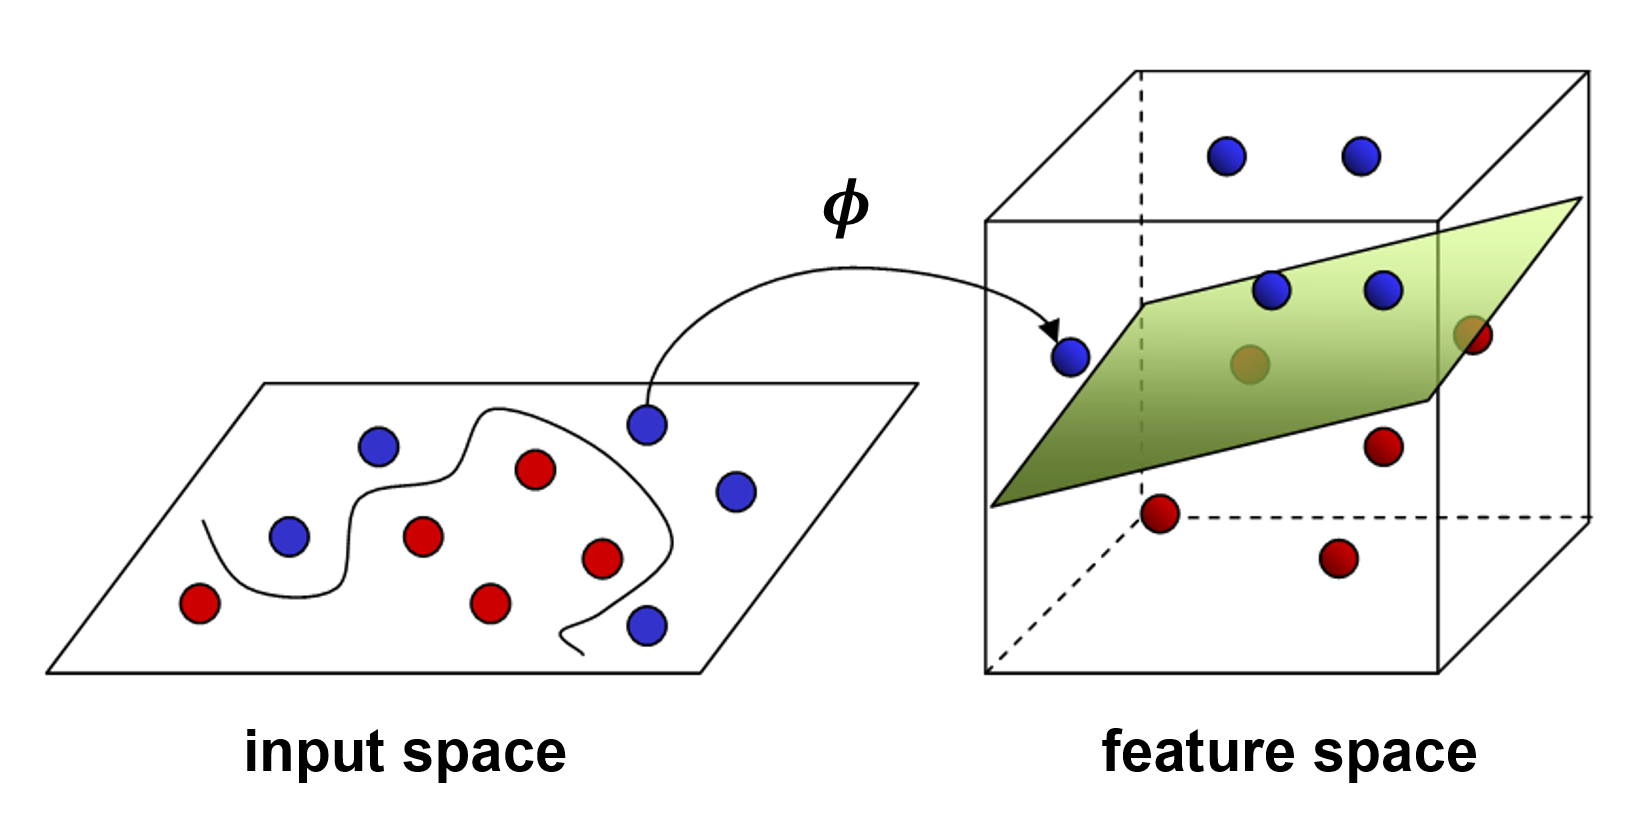
</font>


In [143]:
# Generate data that we are going to use in this exercise
# Please, do not change this cell
from sklearn.model_selection import train_test_split
from sklearn import datasets

circles = datasets.make_circles(n_samples=100, shuffle = True, noise = 0.05, random_state = 111)
circles_pd = pd.DataFrame({'x':circles[0][:,0], 'y':circles[0][:,1], 'class':circles[1]})
circles_pd['class'] = circles_pd['class'].astype('category')

circles_pd_train, circles_pd_test = train_test_split(circles_pd, test_size = 0.4, random_state = 111)

<font color=''> Below we visualise the dataset to understand the scale of the problem we are facing.
</font>


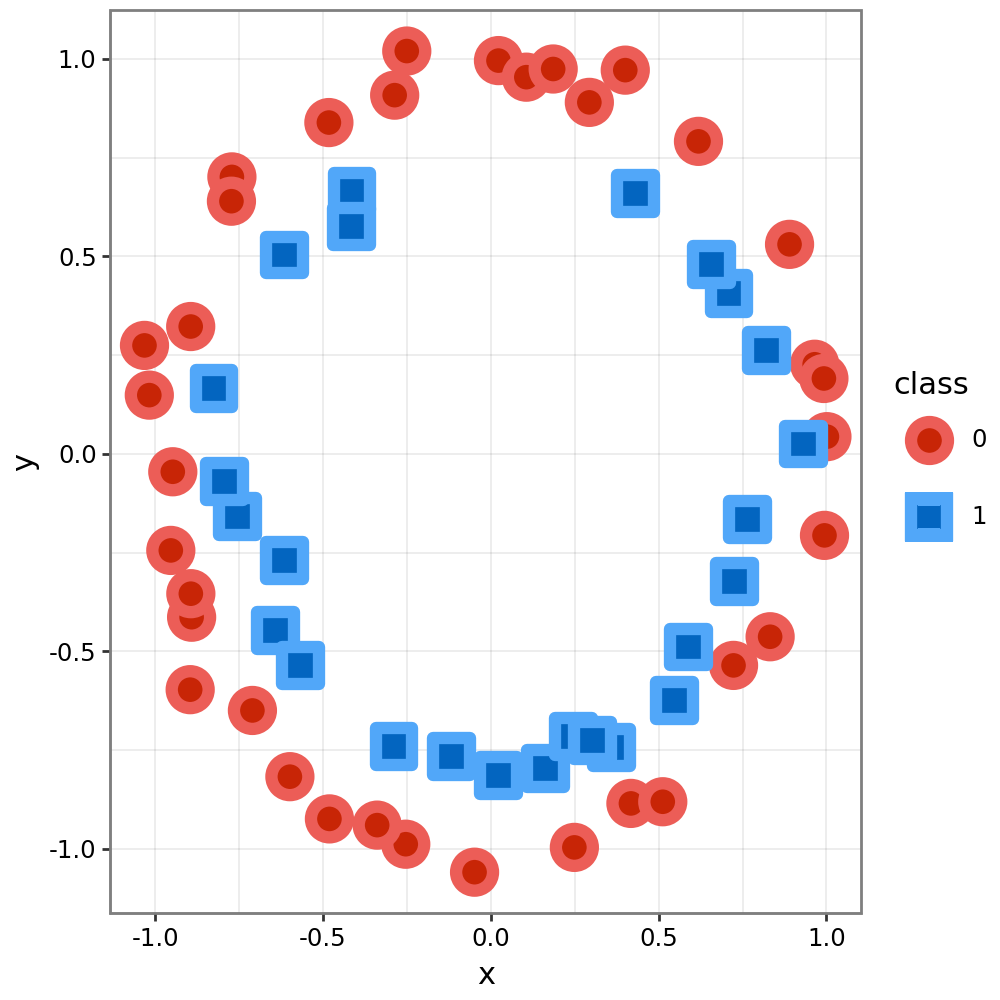

In [144]:
fig = (
    ggplot(data = circles_pd_train,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'class',
                   fill = 'class',
                   colour = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

<font color=''> Does not look very promising indeed.
</font>


<font color=''>**(Homework exercise 2- a)** Train both `DecisionTreeClassifier` with low `max_depth = 5` (to avoid strong overfitting) and `LogisticRegression` (use the same solver `lbfgs` for simplicity) from the previous exercise on these points. Measure and report the performance of the models on test points. (1 point)
</font>


In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

##### YOUR CODE STARTS #####
DT_model = DecisionTreeClassifier(max_depth=5)

DT_model.fit(circles_pd_train[['x','y']], circles_pd_train['class'])

dt_score = DT_model.score(circles_pd_test[['x','y']], circles_pd_test['class'])

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(circles_pd_train[['x','y']], circles_pd_train['class'])

lg_score = logisticRegr.score(circles_pd_test[['x','y']], circles_pd_test['class'])
##### YOUR CODE ENDS #####

print(f'Decision Tree score is {dt_score} and Logistic Regression score is {lg_score}')

Decision Tree score is 0.575 and Logistic Regression score is 0.275


<font color=''>**(Homework exercise 2- b)** In order to remedy the situation create a new variable `z` using two other variables, by projecting all 2D points onto a surface of a paraboloid (3D parabola) with a centre in (0, 0). This way, compute z coordinates for each 2D point in both training and test sets. Train the same models as in **2-a** now taking into account a newly created `z` variable. Report the final scores. (2 points)
Hint: in case it's been a while since you last encountered a paraboloid, find the formula [here](https://en.wikipedia.org/wiki/Paraboloid#Elliptic_paraboloid) (take $a=b=1$).
</font>


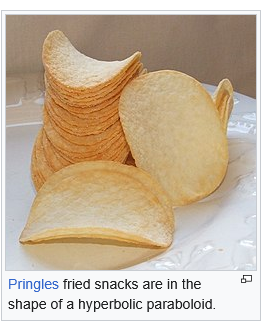


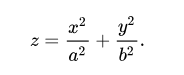

a=b=1

a^2 + b^2 = 1

x^2 + y^2 = z


In [146]:
##### YOUR CODE STARTS #####
circles_pd_train['z'] = circles_pd_train['x']**2 + circles_pd_train['y']**2
circles_pd_test['z'] = circles_pd_train['x']**2 + circles_pd_train['y']**2
##### YOUR CODE ENDS #####

<font color=''>If you did everything correctly in the previous cells, on the figure that is generated by the next cell, you should see two separable classes, which should be also reflected in improved scores for both models.
</font>


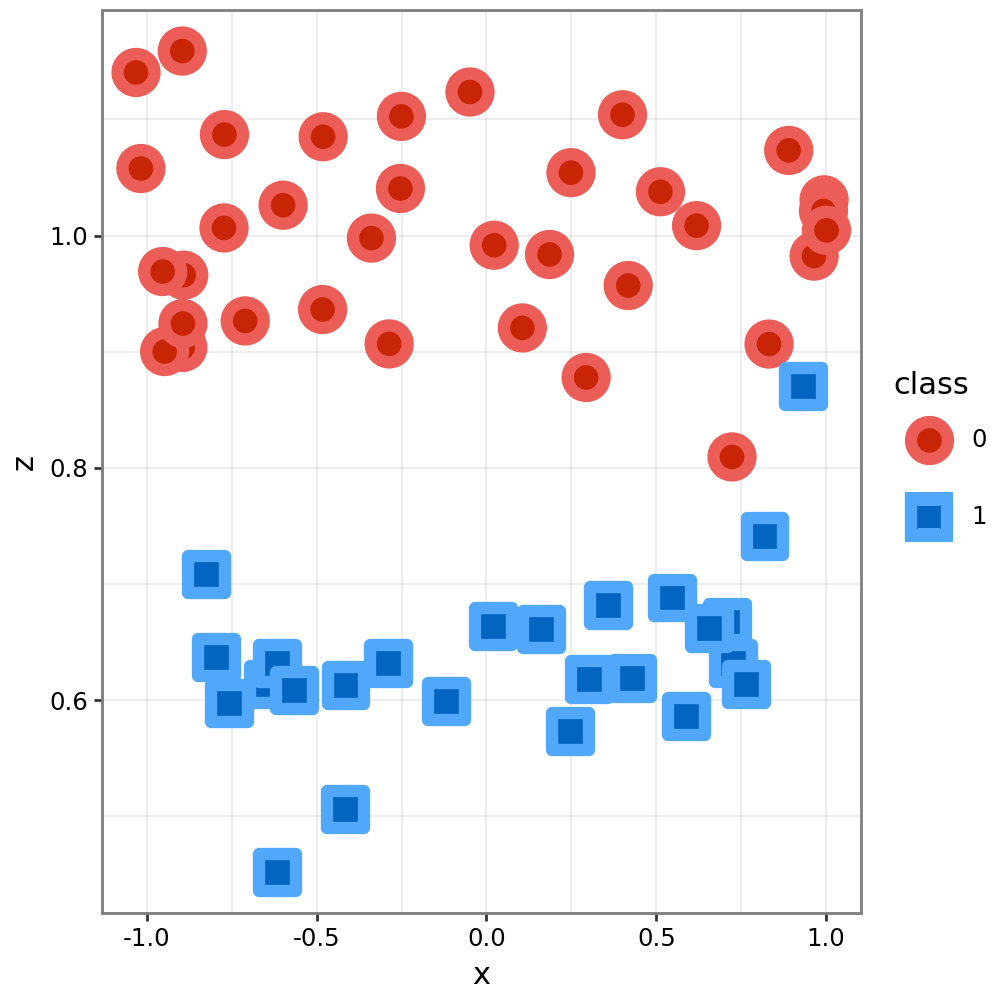

In [147]:
fig = (
    ggplot(data = circles_pd_train,
          mapping = aes(x = 'x', y = 'z')) +
    geom_point(aes(shape = 'class',
                   fill = 'class',
                   colour = 'class'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'z',
    ) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

In [ ]:
##### YOUR CODE STARTS #####

DT_model = DecisionTreeClassifier(max_depth=5)
DT_model.fit(circles_pd_train[['x','y','z']], circles_pd_train['class'])

LG_model = LogisticRegression(solver = 'lbfgs')
LG_model.fit(circles_pd_train[['x','y','z']], circles_pd_train['class'])


dt_score = DT_model.score(circles_pd_test[['x','y','z']], circles_pd_test['class'])

lg_score = LG_model.score(circles_pd_test[['x','y','z']], circles_pd_test['class'])
##### YOUR CODE ENDS #####

print(f'Improved Decision Tree score is {dt_score} and Logistic Regression score is {lg_score}')

Improved Decision Tree score is 1.0 and Logistic Regression score is 0.9333333333333333


## Homework exercise 3 (3 points): Silhouette method

<font color=''> In this exercise, we will get a feeling of how silhoutte method can be implemented in Python and then used to assess the number of hidden groups (clusters) in unlabeled data.

<font color=''> As we have discussed in the lecture, the silhouette score for every point from the dataset is given by the following formula:
$$ s(p) = \frac{b(p) - a(p)}{max(a(p),b(p))}$$
where $a(p)$ is an average distance from $p$ to other points that belong to the same cluster as $p$ ($a(p)$ is referred to as _intra cluster distance_)

<font color=''> and $b(p)$ is a minimum average distance from $p$ to points of another cluster that $p$ does not belong to ($b(p)$ is referred to as _nearest cluster distance_).

<font color=''> To get the final silhouette score $s$, $s(p)$ is averaged for all points in the dataset. The higher the silhouette score the better clustering.


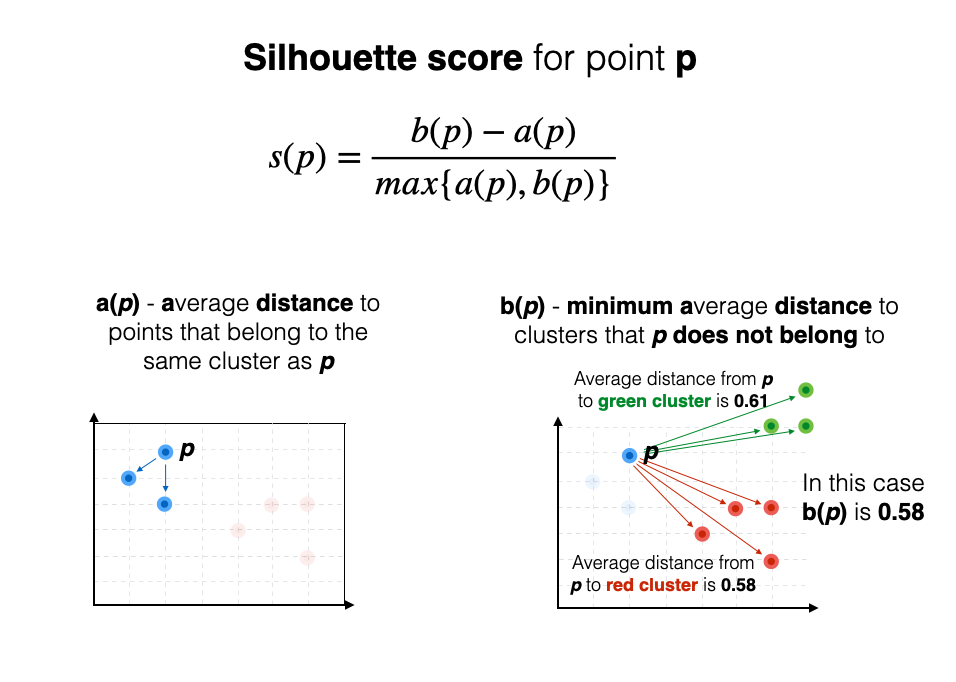


<font color=''> Let's implement it and evaluate several possible clusterings.


In [149]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

<font color=''> We start by creating a synthetic dataset with a few clusters.


In [150]:
cluster_data = pd.DataFrame({'x':[2, 2, 2, 3, 3, 3, 5, 6, 7, 7], 'y':[9, 8, 5, 6, 5, 8, 5, 6, 4, 6]})
cluster_data = cluster_data.to_numpy()

<font color=''> As you can see from the description, we will need to know distances between points in our dataset in order to calculate the silhouette score. Hence, the following function:


In [151]:
# Code from the second practice session
def compute_distances(points):
  # Compute L2 norm on difference between every point and the rest of the points
  distance_matrix = np.array([np.linalg.norm(point - points[:], axis=1) for point in points])

  # Force the values on the main diagonal to be inf
  distance_matrix[np.diag_indices(distance_matrix.shape[0])] = float('inf')

  return distance_matrix

<font color=''>**(Homework exercise 3- a)** Implement silhouette method by completing the function `get_nearest_cluster_distance` and filling in the blanks in the function `manual_silhouette_score`. Test if your code works correctly. PS! We provided some structure inside the `get_nearest_cluster_distance()` function, but if you feel like this is not the way you would implement this part of the algorithm, feel free to do it your way (but only inside that function!). (1.5 points)


In [152]:
def get_intra_cluster_distance(point_id, cluster_data, cluster_labels, distance_matrix):
  # Find the ids of the points belonging to the same cluster as the point with the given point_id
  intra_cluster_points_ids = np.flatnonzero(cluster_labels == cluster_labels[point_id])

  if len(intra_cluster_points_ids) > 1:
    # Take distances between the point with the given point_id and its cluster's neighbours
    intra_cluster_distances = [
      distance_matrix[point_id][neighbour_id] for neighbour_id in intra_cluster_points_ids
        if point_id != neighbour_id
      ]

    return np.mean(intra_cluster_distances)

  else: # when we have one point in the cluster
    return 0

def get_nearest_cluster_distance(point_id, cluster_data, cluster_labels, distance_matrix):
  ##### YOUR CODE STARTS #####
  # find the ids of the points belonging to different clusters from the point with the given point_id
  diff_cluster_points_ids = np.flatnonzero(cluster_labels != cluster_labels[point_id])

  # find the labels corresponding to the ids found in the previous step
  diff_cluster_points_labels = cluster_labels[diff_cluster_points_ids]

  # find distances between the given point and the points belonging to the other clusters
  diff_cluster_points_distances = distance_matrix[point_id][diff_cluster_points_ids]

  # compute the average distances from the point to all other clusters
  # hint: you probably need a double loop and you can use np.unique to get unique set of labels for the different clusters
  diff_cluster_average_distances = []
  for label in np.unique(diff_cluster_points_labels):
    label_distances = diff_cluster_points_distances[diff_cluster_points_labels == label]
    diff_cluster_average_distances.append(np.mean(label_distances))

  # take the minimum distance to find the nearest cluster average distance
  near_cluster_average_distance = min(diff_cluster_average_distances)

  return near_cluster_average_distance
  ##### YOUR CODE ENDS #####


def manual_silhouette_score(cluster_data, cluster_labels):
  silhouette_scores = np.zeros(len(cluster_data))

  #compute distances between all points
  distance_matrix = compute_distances(cluster_data)

  for point_id in range(len(cluster_data)):
    ##### YOUR CODE STARTS #####
    ic_dist = get_intra_cluster_distance(point_id, cluster_data, cluster_labels, distance_matrix)
    nc_dist = get_nearest_cluster_distance(point_id, cluster_data, cluster_labels, distance_matrix)
    if ic_dist != 0:
      silhouette_scores[point_id] = (nc_dist - ic_dist) / max(ic_dist, nc_dist)
    else:
      silhouette_scores[point_id] = 0
    ##### YOUR CODE ENDS #####
  return np.mean(silhouette_scores)

In [153]:
test_points = np.array([[2,6], [3,2], [2,1]])
test_labels = np.array([0,1,1])
print(f'Manual silhouette score is {manual_silhouette_score(test_points, test_labels)} and it should be 0.458.')

Manual silhouette score is 0.4580533724134545 and it should be 0.458.


<font color=''>**(Homework exercise 3- b)** Use `manual_silhouette_score` to compute silhouette score for as many clusterings as it makes sense for the given dataset (use KMeans algorithm for clustering). Compare your scores to the ones computed by the scikit-learn function `silhouette_score` to double-check that your implementation works correctly. (1 point)


In [154]:
##### YOUR CODE STARTS #####
K_options = range(2, 8)
custom_silhouette_scores = []

for num_clusters in K_options:
  print(f"Number of clusters: {num_clusters}")
  clustering = KMeans(n_clusters=num_clusters, random_state=111).fit(cluster_data)

  # Calculate silhouette score using manual implementation
  custom_silhouette_score = manual_silhouette_score(cluster_data, clustering.labels_)
  custom_silhouette_scores.append(custom_silhouette_score)
  print(f"Custom silhouette score: {custom_silhouette_score}")

  # Calculate silhouette score using scikit-learn implementation
  sklearn_silhouette_score = silhouette_score(cluster_data, clustering.labels_)
  print(f"scikit-learn silhouette score: {sklearn_silhouette_score}")

  # Compare the two scores
  assert np.allclose(custom_silhouette_score, sklearn_silhouette_score)
  print("\n")
##### YOUR CODE ENDS #####

Number of clusters: 2
Custom silhouette score: 0.4179970491289261
scikit-learn silhouette score: 0.4179970491289261


Number of clusters: 3
Custom silhouette score: 0.559986721021637
scikit-learn silhouette score: 0.559986721021637


Number of clusters: 4
Custom silhouette score: 0.4053085484794073
scikit-learn silhouette score: 0.4053085484794073


Number of clusters: 5
Custom silhouette score: 0.42289252013463746
scikit-learn silhouette score: 0.42289252013463746


Number of clusters: 6
Custom silhouette score: 0.29010821513284213
scikit-learn silhouette score: 0.29010821513284213


Number of clusters: 7
Custom silhouette score: 0.2360405551961823
scikit-learn silhouette score: 0.2360405551961823




<font color='red'>**(Homework exercise 3- c)** Finally, use matplotlib to visualise the resulting silhouette scores. Next, by looking at this visualisation report the most reasonable number of clusters. Then in order to verify your guess plot the actual data points. (0.5 points)


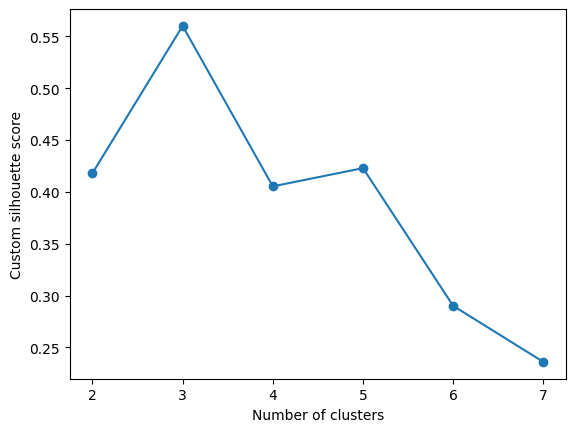

In [155]:
##### YOUR CODE STARTS #####
plt.plot(K_options, custom_silhouette_scores, marker='o')
##### YOUR CODE ENDS #####
plt.ylabel('Custom silhouette score')
plt.xlabel('Number of clusters')
plt.xticks(K_options)
plt.show()

<font color=''> Below report the the most reasonable number of clusters:


Your answer:


In [156]:
# The best number of clusters would be 3, because it has the highest silhouette score.
#  2, 4 and 5 are also quite good options, but 3 is the best.

<font color=''> Plot data points to verify your guess:


In [157]:
cluster_data[:,0], cluster_data[:][0]

(array([2, 2, 2, 3, 3, 3, 5, 6, 7, 7]), array([2, 9]))

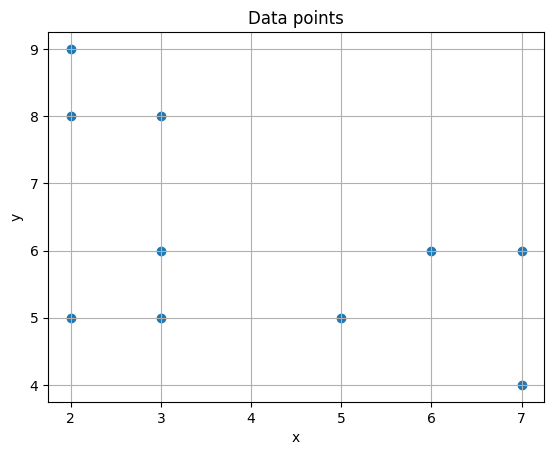

In [158]:
##### YOUR CODE STARTS #####
plt.scatter(cluster_data[:,0], cluster_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.grid(True)
plt.show()
##### YOUR CODE ENDS #####

# Bonus exercises

_(NB, these are optional exercises!)_


## Bonus exercise 1 (0.5 bonus points):

<font color='red'> Apply t-SNE or UMAP on MNIST data, plot the results as we have done for PCA. Visually compare the results. Which one in your opinion worked better? What are the advantages and disadvantages of these methods? </font>


## Bonus exercise 2 (0.5 bonus points):

<font color='red'> Use the output of bonus exercise 1 (either from t-SNE or UMAP) to train your favourite ML model and compare its performance with the same model trained on the original data and on data transformed with conventional PCA. What differences you observe and why? </font>


## Bonus exercise 3 (4 bonus points):

<font color='red'> In this Exercise, you are going to implement K-means step by step and run it on the three datasets we used before in the practice session (moons, circles and the one without a structure)

-   Implement K-means using only numpy and basic python operations (**no sklearn**)
-   Run it on the same three datasets used before (moons, circles and the one without a structure). Compare the resulting clusters with those we got before using sklearn KMeans.
-   For every dataset, plot the sum of euclidean distances between points in a cluster and its center, at every step.
-   For one dataset of the three, make a gif or any animation to show how the means evolve during training. (hint: you can use this [library](https://pypi.org/project/gif/) or any other ploting method of your choice. Use a smaller number of samples to get better visuals.)</font>


# Comments (optional feedback to the course instructors)

Here, please, leave your comments regarding the homework, possibly answering the following questions:

-   how much time did you spend on this homework? 4-6h
-   was it too hard/easy for you? 2 was okey, 3 was really hard and 1 was confusing
-   what would you suggest to add or remove? give more examples on silhouette part. also give more examples on the first one as well, it was really confusing.
-   anything else you would like to tell us


Your comments:


In [ ]:
#  Please dont use <font style="color: red"> it is hard to read. My head hurts now :'(

# <font color='red'> End of the homework. Please don't delete this cell.</font>
